# Held-Karp Algorithm

**Authors**: Ben Morris, Daniel Park, Jess Brown, Han Vakil

## Explanation

**Dynamic Programming (DP)** is a optimization most commonly used in mathematics and computer science by taking a problem and breaking down large problems into simpler sub-problems in a recursive matter which can then be nested recursively inside larger problems. When we compute the smaller sub-problems, we can then save those calculations with a process called **memoization** and use those solutions to answer the larger problems until we get our final solution.

The **Held-Karp Algorithm** uses this approach....

In the context of the TSP problem, we can use DP to further optimize the Brute-Force approach and save already computed path-searches to find the global optimum path.

- Introduction to how algorithm and how it is computed on paper / mathematically
- Transition into Code Implementation
- What is Predicted Time Complexity
- Computed Time Complexity with Han's Algorithm


## Libraries and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random
from utils import random_graph, create_adjacency_matrix
import math
from dynamic_programming import dp
import time
from alg_test import *

import brute_force
import branch_and_bound
import utils
import alg_test
import math
import networkx as nx
import held_karp
import matplotlib.pyplot as plt
import copy
import numpy as np
import nearest_neighbor

## Code Implementation

In [2]:
# If AttributeError: module 'scipy.sparse' has no attribute 'coo_array'
# pip install --upgrade scipy networkx

# Number of nodes in graph (User Input)
n = 4

def create_graph(n, is_directed = True, is_complete = True):
    """
    Creates a directed and/or completed graph with n nodes
    
    :n: number of nodes in the graph
    :is_directed: is graph directed - default: True
    :is_complete: is graph complete - default: True
    
    :returns (default: a directed complet) nx.graph
    """
    if is_directed:
        graph = random_graph(n, True)
    else:
        graph = random_graph(n)
    if not is_complete:
        for i in range(0, math.floor(n / 2)):
            edges_to_remove = random.sample(range(0,n-1), 2)
            graph.remove_edge(edges_to_remove[0], edges_to_remove[1])
    return graph

created_graph = create_graph(n)
adj_graph = create_adjacency_matrix(created_graph)
new_graph = adj_graph.todense().tolist()
print(new_graph)

/Users/danielpark/Documents/directed-salesman/utils.py:219: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return nx.adjacency_matrix(graph)


[[0.0, 0.6492779455910144, 0.5349580108407168, 0.5046481624734692], [0.1286218040596786, 0.0, 0.15101741508649053, 0.39492569430909735], [0.22732405896351987, 0.10305789070882132, 0.0, 0.41589839175146054], [0.9820173997547523, 1.0946014515856244, 1.1973217265635636, 0.0]]


In [3]:
def dp_runner(i, bitmask, distance_matrix):
    """
    Traverses the graph and finds the shortest Hamiltonian path on a graph 
    using dynamic programming by caching inner paths to find most optimal path

    :i: ith node
    :bitmask: represents the remaining nodes in the subset (TODO: bits are faster to operate)

    :returns: cost of the most efficient path
    """
    cache = [[-1]*(1 << (n)) for _ in range(n)]
    
    # Base case: 
    # if only ith bit and 1st bit is set in our bitmask
    # we have visited all other nodes already
    if bitmask == ((1 << i) | 3):
        return distance_matrix[1][i]
  
    # Memoize visited distances
    if cache[i][bitmask] != -1:
        return cache[i][bitmask]
    
    # Result of the sub-problem
    result = 10**9
  
    # Travel to all nodes j and end the path at ith node
    for j in range(1, n):
        if (bitmask & (1 << j)) != 0 and j != i and j != 1:
            result = min(result, dp_runner(j, bitmask & (~(1 << i)), distance_matrix) + distance_matrix[j][i])
    
    # Store minimum value
    cache[i][bitmask] = result
    return result

The solution path is [0.0, 0.15101741508649053, 0.39492569430909735]
The cost of most efficient path is 1.6615172584235753


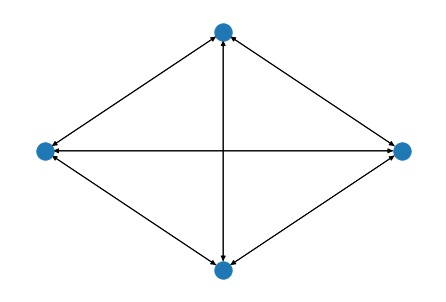

In [4]:
# Driver program
cost = 10**9
solution_path = []

# Go from node 1 visiting all nodes in between to i
# Return to i when complete
for i in range(1, n):
    cost = min(cost, dp_runner(i, (1 << n)-1, new_graph) + new_graph[i][1])
    solution_path.append(new_graph[1][i])

print(f"The solution path is {solution_path}")
print(f"The cost of most efficient path is {cost}")
nx.draw_circular(created_graph)

In [5]:
# Test dynamic_programming.py
print(dp(created_graph))

(1.6615172584235753, [0.0, 0.15101741508649053, 0.39492569430909735])


/Users/danielpark/Documents/directed-salesman/utils.py:219: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return nx.adjacency_matrix(graph)


## Time Complexity

The number of possible subsets can be at most $N \times 2^N$. Each subset can be solved in $\mathcal{O}(N)$ times. Therefore, the time complexity of this algorithm would be 

$$\mathbf{\mathcal{O}(N^{2} \times 2^N)}.$$

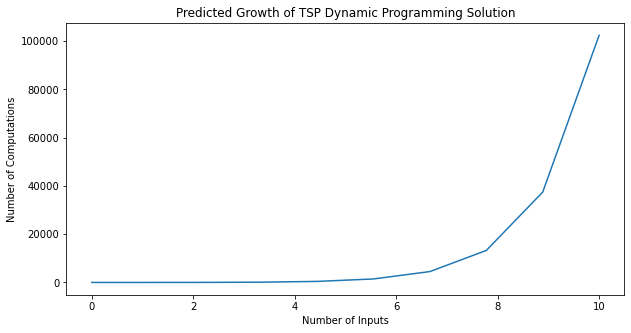

In [6]:
# Creating vectors X and Y
n = np.linspace(0, 10, 10)
y = (n ** 2) * (2 ** n)

fig = plt.figure(figsize = (10, 5))

# Create the plot
plt.plot(n, y)
plt.title("Predicted Growth of TSP Dynamic Programming Solution")
plt.xlabel("Number of Inputs")
plt.ylabel("Number of Computations")
 
# Show the plot
plt.show()

## Sources

- https://en.wikipedia.org/wiki/Dynamic_programming
- https://www.youtube.com/watch?v=Q4zHb-Swzro&t=118s&ab_channel=AbdulBari
- http://www.lsi.upc.edu/~mjserna/docencia/algofib/P07/dynprog.pdf
- https://medium.com/basecs/speeding-up-the-traveling-salesman-using-dynamic-programming-b76d7552e8dd
- https://www.geeksforgeeks.org/travelling-salesman-problem-using-dynamic-programming/#:~:text=Travelling%20Salesman%20Problem%20(TSP)%3A,returns%20to%20the%20starting%20point.
- https://www.geeksforgeeks.org/traveling-salesman-problem-tsp-implementation/
- https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
- https://people.eecs.berkeley.edu/~vazirani/algorithms/chap6.pdf
- https://realpython.com/python-bitwise-operators/